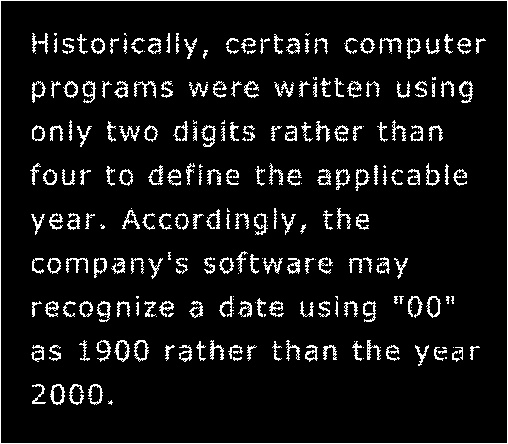

In [ ]:
#Libraries Used
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

im=cv2.imread("/content/gamma_corrected.jpg")
im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2_imshow(im)


In [ ]:

resolution=im.shape
im=np.array(im)
new_image=np.array(im)

#Code adds replication rows and columns to the image on the borders
#Should be added according to the filter used
#Adding Rows
#At Front
im= np.concatenate([[im[0]],im],axis=0)
#At End
im=np.concatenate([im,[im[resolution[0]-1]]],axis=0)
#At Front
im=np.transpose(im)
im=np.concatenate([[im[0]],im],axis=0)
#At End
im=np.concatenate([im,[im[resolution[0]-1]]],axis=0)
im=np.transpose(im)
#---------------------------------------------------------------
resolution=im.shape
print("Resolution:",resolution)

for x in range(1,resolution[0]-2):
  for y in range(1,resolution[1]-2):
    new_image[x][y]=im[x][y]

Resolution: (291, 449)


Image Processed...Successfully.



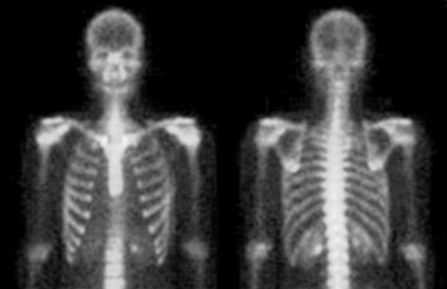

In [ ]:
#Smoothing Average Filter 
#5x5 Kernal
sum = 0
for x in range(1,resolution[0]-2):
 for y in range(1,resolution[1]-2):
   for i in range(x-1,x+2): #change the values of in this case 1,2 according to the filter (3x3)
     for j in range(y-1,y+2):#change the values of in this case 1,2 according to the filter (3x3)
       sum= sum+int(im[i][j]) #looping to calculating sum of filter
   new_image[x][y]=(sum/9) #new resultant image intensities are assigned 
   sum=0 #reinitializing the sum variable
#Display Message Prompt
print("Image Processed...Successfully.")
print("")
cv2.imwrite("Smooth.jpg",new_image)
new_image=cv2.imread("/content/Smooth.jpg")
cv2_imshow(new_image)

Findings:
By increasing the size of the filter, the image gets blurred.
As the filter size increases the image gets more and more blurred.

Why?
    As the size of the box filter increases more intensities are weighted to form the resultant intensity pixel. Hence, the details of the image are lost with the use of a filter that has a larger NxN size. 


In [ ]:
#Sobet Operator
im=cv2.imread("/content/Smooth.jpg")

#Converting to 2dlist
original_image= np.array(im)
new_image=np.array(im)

resolution=im.shape
print("Resolution:",resolution)

hsum = 0
vsum = 0
sum = 0
for x in range(1,resolution[0]-1):
 for y in range(1,resolution[1]-1):
   #Horizantal edges
   for i in range(x-1,x+2): #change the values of in this case 1,2 according to the filter (3x3)
     if (i==(x-1)):
       hsum = hsum - (int((original_image[i][y-1])[0])+2*(int((original_image[i][y])[0]))+int((original_image[i][y+1])[0]))
     elif (i==(x+1)):
       hsum = hsum + int((original_image[i][y-1])[0])+2*(int((original_image[i][y])[0]))+int((original_image[i][y+1])[0])
   #Vertical Edges
   for j in range(x-1,x+2):
     vsum = vsum + -1*(int((original_image[i][y-1])[0])) + int((original_image[i][y+1])[0])
   sum = abs(abs(vsum)+abs(hsum))
   new_image[x][y]=original_image[x][y]-sum #new resultant image intensities are assigned 
   hsum=0 #reintializing the sum variable
   vsum=0 #reintializing the sum variable

#Display Message Prompt
print("Image Processed...Successfully.")
print("")
kernel = np.array([[0, 0, 0],
                   [-1, 3,-1],
                   [0,0,0]])

new_image = cv2.filter2D(src=im, ddepth=-1, kernel=kernel)
#new_image=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2.imwrite("Sobet.jpg",new_image)


Resolution: (289, 447, 3)
Image Processed...Successfully.



True

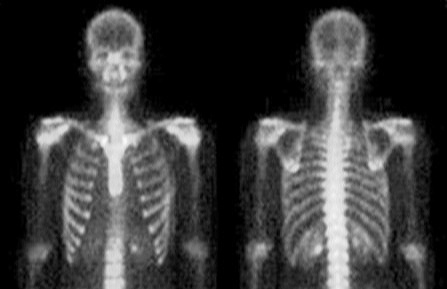

In [ ]:
new_image=cv2.imread("/content/Sobet.jpg")
cv2_imshow(new_image)

In [ ]:
#Lapacian Filter 
im=cv2.imread("/content/Sobet.jpg")

kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

new_image = cv2.filter2D(src=im, ddepth=-1, kernel=kernel)
cv2.imwrite("Sharp_LF.jpg",new_image)

True

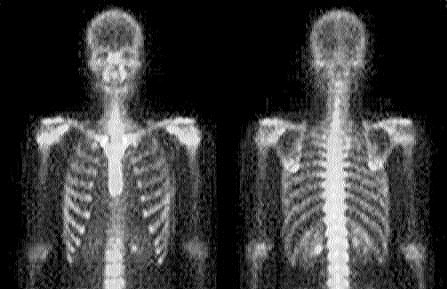

In [ ]:
new_image=cv2.imread("/content/Sharp_LF.jpg")
cv2_imshow(new_image)

In [ ]:

import cv2
import numpy as np

img = cv2.imread('noiseremoved.jpg')
bilinear_img = cv2.resize(img,None, fx = 10, fy = 10, interpolation = cv2.INTER_LINEAR)
cv2.imshow('original ',img)
cv2.imshow('BiLinear Image', bilinear_img)
cv2.imwrite('interpolated.jpg', bilinear_img)
